# **(ADD THE NOTEBOOK NAME HERE)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write here which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

In [5]:
%pip install -r ../requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 16.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 35.8 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 125.6 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 123.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing2/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing2'

# Load collected data

In [4]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
# import all necessary packages and libraries for the notebook
import os
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
sns.set(style="whitegrid")


## Investigate cleaned data file

* First we load the cleaned data file to have a quick overview of the input data.

In [6]:
import pandas as pd

# Corrected file path
df_raw_path = "/workspace/heritage-housing2/jupyter_notebooks/outputs/datasets/cleaned/HousePricesCleaned.csv" 

# Read the CSV file
df = pd.read_csv(df_raw_path)

# Display the first 5 rows
df.head(5)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.000000,No,706,GLQ,150,548,RFn,2003.0,...,8450,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.000000,Gd,978,ALQ,284,460,RFn,1976.0,...,9600,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.000000,Mn,486,GLQ,434,608,RFn,2001.0,...,11250,68.0,162.0,42,5,7,920,2001,2002,223500
3,961,0.0,2.869214,No,216,ALQ,540,642,Unf,1998.0,...,9550,60.0,0.0,35,5,7,756,1915,1970,140000
4,1145,0.0,4.000000,Av,655,GLQ,490,836,RFn,2000.0,...,14260,84.0,350.0,84,5,8,1145,2000,2000,250000


In [7]:
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
pip install pandas seaborn scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


## Initial heatmap and check data types
* We create a heatmap and a data type table to check the inital correlations and control which data types we have in our input data file.

All columns with their data types:
 1stFlrSF          int64
2ndFlrSF        float64
BedroomAbvGr    float64
BsmtExposure     object
BsmtFinSF1        int64
BsmtFinType1     object
BsmtUnfSF         int64
GarageArea        int64
GarageFinish     object
GarageYrBlt     float64
GrLivArea         int64
KitchenQual      object
LotArea           int64
LotFrontage     float64
MasVnrArea      float64
OpenPorchSF       int64
OverallCond       int64
OverallQual       int64
TotalBsmtSF       int64
YearBuilt         int64
YearRemodAdd      int64
SalePrice         int64
dtype: object

Converted float columns:
    2ndFlrSF  BedroomAbvGr  GarageYrBlt  LotFrontage  MasVnrArea
0       854             3         2003           65         196
1         0             3         1976           80           0
2       866             3         2001           68         162
3         0             3         1998           60           0
4         0             4         2000           84         350


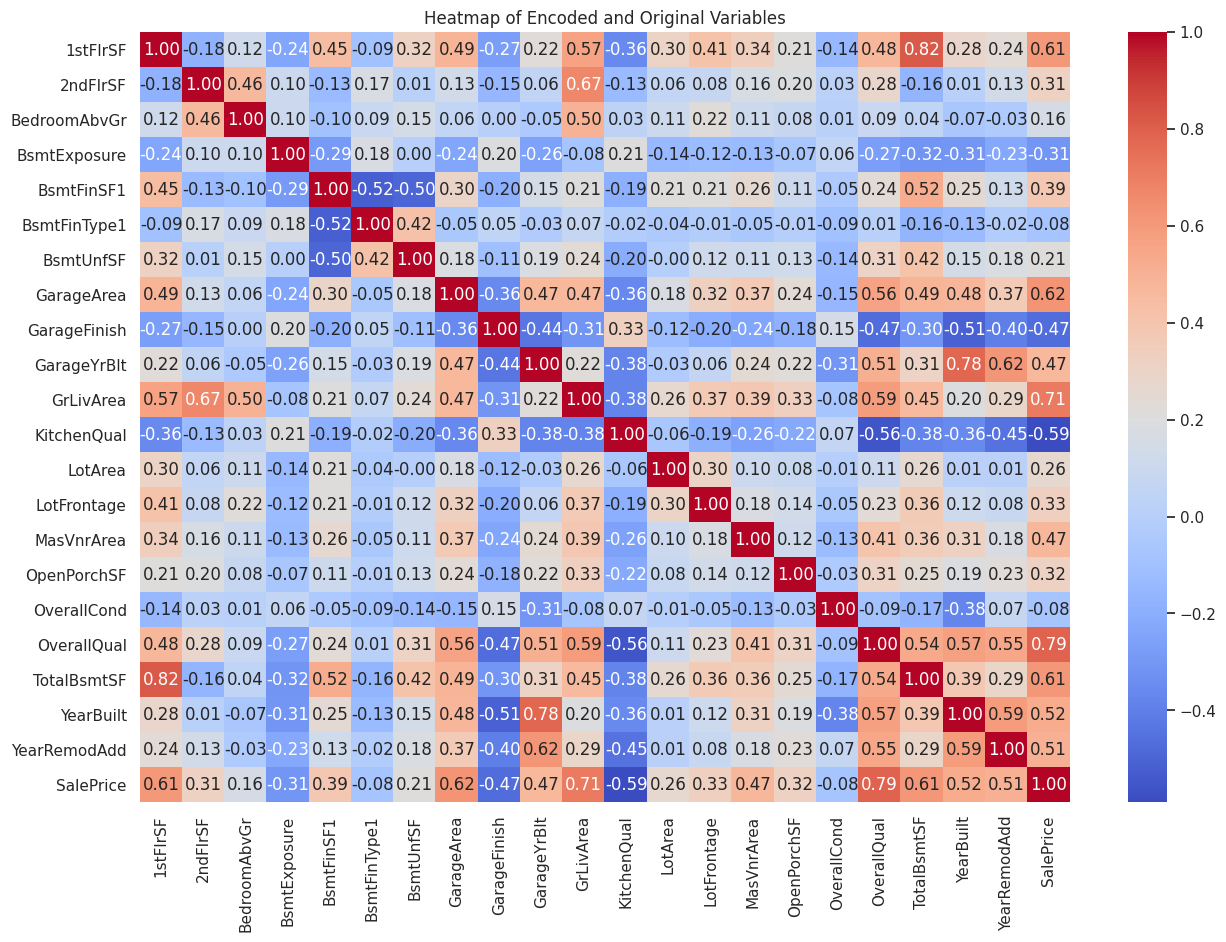

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "/workspace/heritage-housing2/jupyter_notebooks/outputs/datasets/cleaned/HousePricesCleaned.csv"
df = pd.read_csv(file_path)

# Display column names and their data types
print("All columns with their data types:\n", df.dtypes)

# Encode categorical variables
label_encoders = {}
categorical_columns = ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Convert float variables to integers
float_columns = df.select_dtypes(include=['float64']).columns.tolist()
for column in float_columns:
    df[column] = df[column].round().astype(int)

# Print converted float values for verification
print("\nConverted float columns:\n", df[float_columns].head())

# Prepare the data for heatmap
encoded_df = df.copy()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(encoded_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Encoded and Original Variables')
plt.show()

### Initial conclusion: most significant variables to sale price simple and we have data types of integer, float and object.

* The most significant variables accordiong to first on the cleaned data file are (above 0.6)
    * 0.79 OverallQuall
    * 0.71 GrLivArea
    * 0.62 GarageArea
    * 0.61 1stFlrSF
    * 0.61 TotalBsmtSF

## Detailed heatmap and variable ranking to sale price

        Variable   Pearson  Spearman  Abs_Pearson  Abs_Spearman  Pearson_Rank  \
17   OverallQual  0.790982  0.809829     0.790982      0.809829           1.0   
10     GrLivArea  0.708624  0.731310     0.708624      0.731310           2.0   
7     GarageArea  0.623431  0.649379     0.623431      0.649379           3.0   
18   TotalBsmtSF  0.613581  0.602725     0.613581      0.602725           4.0   
19     YearBuilt  0.522897  0.652682     0.522897      0.652682           7.0   
0       1stFlrSF  0.605852  0.575408     0.605852      0.575408           5.0   
11   KitchenQual -0.589189 -0.569857     0.589189      0.569857           6.0   
20  YearRemodAdd  0.507101  0.571159     0.507101      0.571159           8.0   
9    GarageYrBlt  0.466754  0.563256     0.466754      0.563256          10.0   
8   GarageFinish -0.465039 -0.533341     0.465039      0.533341          11.0   
14    MasVnrArea  0.472614  0.415906     0.472614      0.415906           9.0   
15   OpenPorchSF  0.315856  

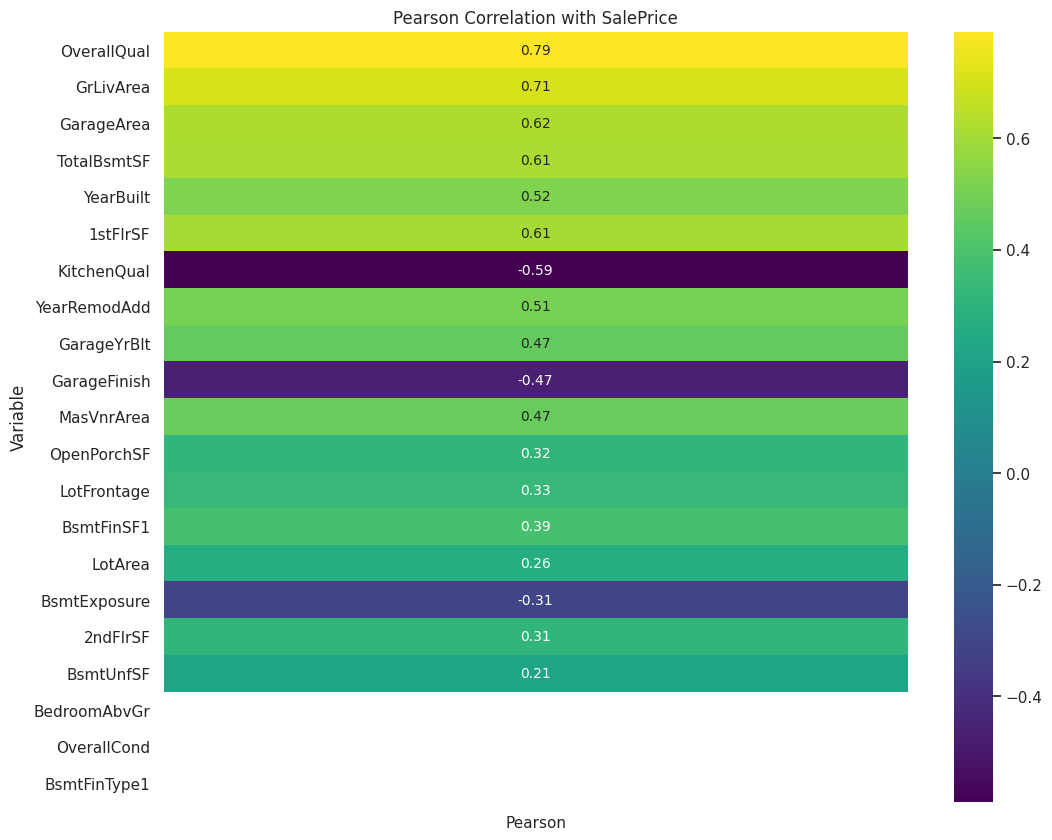

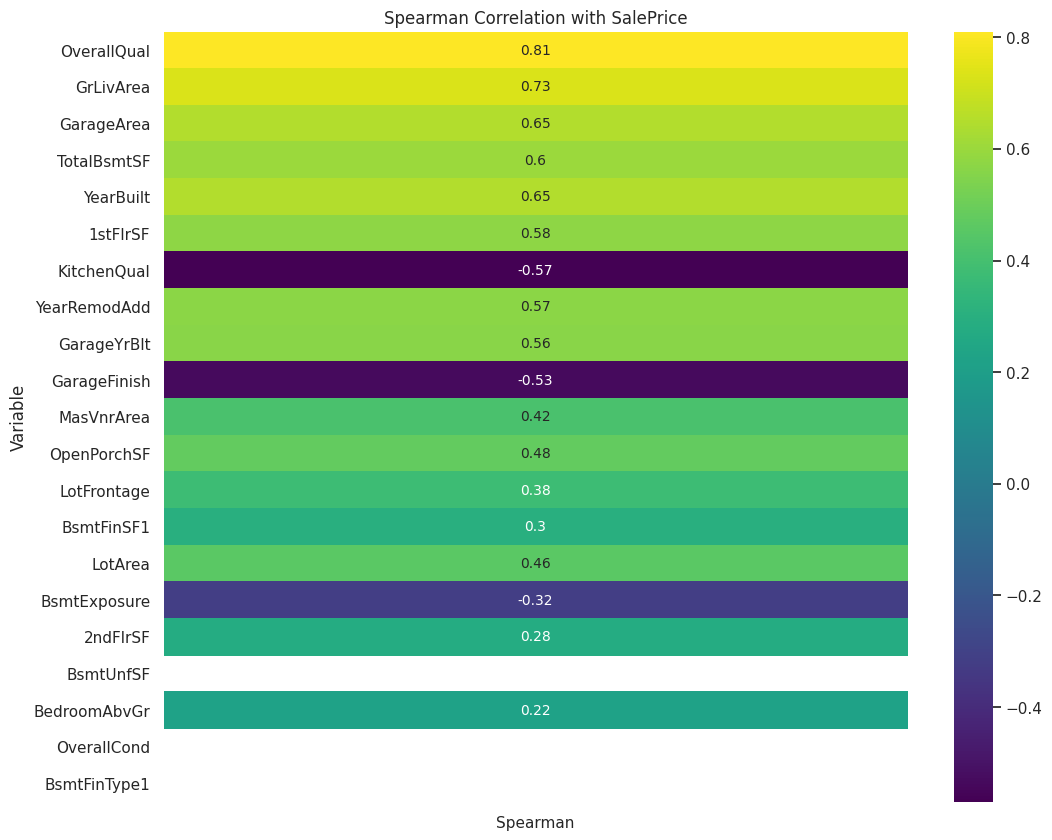

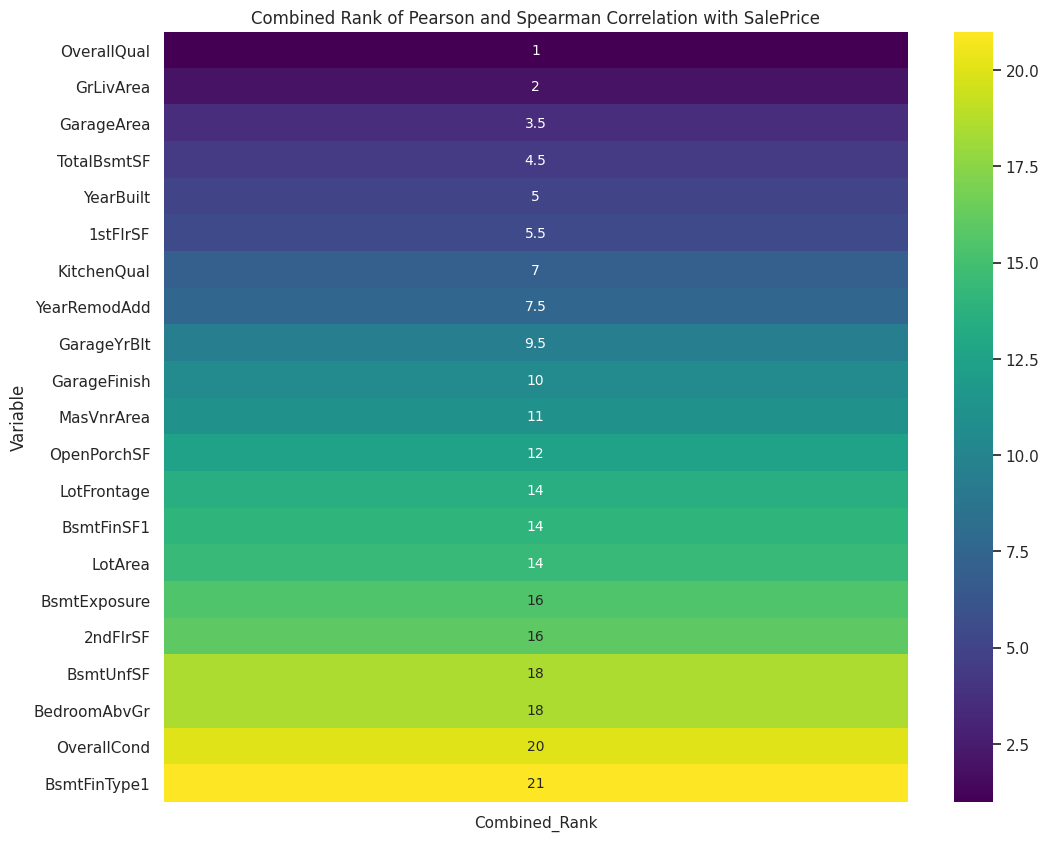

In [10]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')

# Identify categorical variables (you need to define this based on your data)
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()

# Identify numeric variables
numeric_vars = df.select_dtypes(include=[np.number]).columns.tolist()

# Identify categorical variables and convert to numerical
df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

# Ensure 'SalePrice' is included in the numeric variables
numeric_vars = df_encoded.select_dtypes(include=[np.number]).columns.tolist()
if 'SalePrice' not in numeric_vars:
    numeric_vars.append('SalePrice')

# Dictionary to store correlation results
correlations = {'Variable': [], 'Pearson': [], 'Spearman': []}

# Calculate correlations
for var in numeric_vars:
    if var != 'SalePrice':  # Exclude the target variable itself
        x = df_encoded[var]
        y = df_encoded['SalePrice']
        
        pearson_coef, _ = pearsonr(x, y)
        spearman_coef, _ = spearmanr(x, y)
        
        correlations['Variable'].append(var)
        correlations['Pearson'].append(pearson_coef)
        correlations['Spearman'].append(spearman_coef)

# Create a DataFrame with the correlation results
correlation_df = pd.DataFrame(correlations)

# Calculate the absolute values of the correlations
correlation_df['Abs_Pearson'] = correlation_df['Pearson'].abs()
correlation_df['Abs_Spearman'] = correlation_df['Spearman'].abs()

# Rank the variables based on absolute correlations
correlation_df['Pearson_Rank'] = correlation_df['Abs_Pearson'].rank(ascending=False)
correlation_df['Spearman_Rank'] = correlation_df['Abs_Spearman'].rank(ascending=False)

# Combine the ranks (average of Pearson and Spearman ranks)
correlation_df['Combined_Rank'] = (correlation_df['Pearson_Rank'] + correlation_df['Spearman_Rank']) / 2

# Sort the DataFrame based on the combined rank
correlation_df.sort_values(by='Combined_Rank', inplace=True)

# Display the correlation results
print(correlation_df)

# Extract the most related variable
most_related_variable = correlation_df.iloc[0]['Variable']
print(f"The most related variable to SalePrice is: {most_related_variable}")

# Function to create heatmaps
def create_heatmap(df, title, threshold, figsize=(12, 10), font_annot=10):
    mask = np.zeros_like(df, dtype=bool)
    mask[abs(df) < threshold] = True
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(df, annot=True, mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=ax)
    plt.title(title)
    plt.show()

# Prepare data for heatmaps
correlation_df.set_index('Variable', inplace=True)
heatmap_data_pearson = correlation_df[['Pearson']]
heatmap_data_spearman = correlation_df[['Spearman']]
heatmap_data_combined = correlation_df[['Combined_Rank']]

# Create heatmaps
create_heatmap(heatmap_data_pearson, 'Pearson Correlation with SalePrice', threshold=0.2)
create_heatmap(heatmap_data_spearman, 'Spearman Correlation with SalePrice', threshold=0.2)
create_heatmap(heatmap_data_combined, 'Combined Rank of Pearson and Spearman Correlation with SalePrice', threshold=0.2)


In [18]:
top_n = 6

# Extract the top_n variables based on Combined Rank
top_combined_vars = correlation_df.nsmallest(top_n, 'Combined_Rank').index.to_list()

# Create the vars_to_study set from the top_combined_vars list
vars_to_study = set(top_combined_vars)

print("Variables to study based on top Combined Rank:", vars_to_study)

Variables to study based on top Combined Rank: {'GarageArea', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'OverallQual', 'GrLivArea'}


In [19]:
df_eda = df.filter(list(vars_to_study) + ['SalePrice'])
df_eda.head(5)

,GarageArea,YearBuilt,TotalBsmtSF,1stFlrSF,OverallQual,GrLivArea,SalePrice
0,548,2003,856,856,7,1710,208500
1,460,1976,1262,1262,6,1262,181500
2,608,2001,920,920,7,1786,223500
3,642,1915,756,961,7,1717,140000
4,836,2000,1145,1145,8,2198,250000


Section 1 content

---

## Display view of Pearson and Spearman per variable.

In [13]:
unique_kitchen_qualities = df['KitchenQual'].unique()
print("Unique values in 'KitchenQual' column:", unique_kitchen_qualities)

Unique values in 'KitchenQual' column: [2 3 0 1]


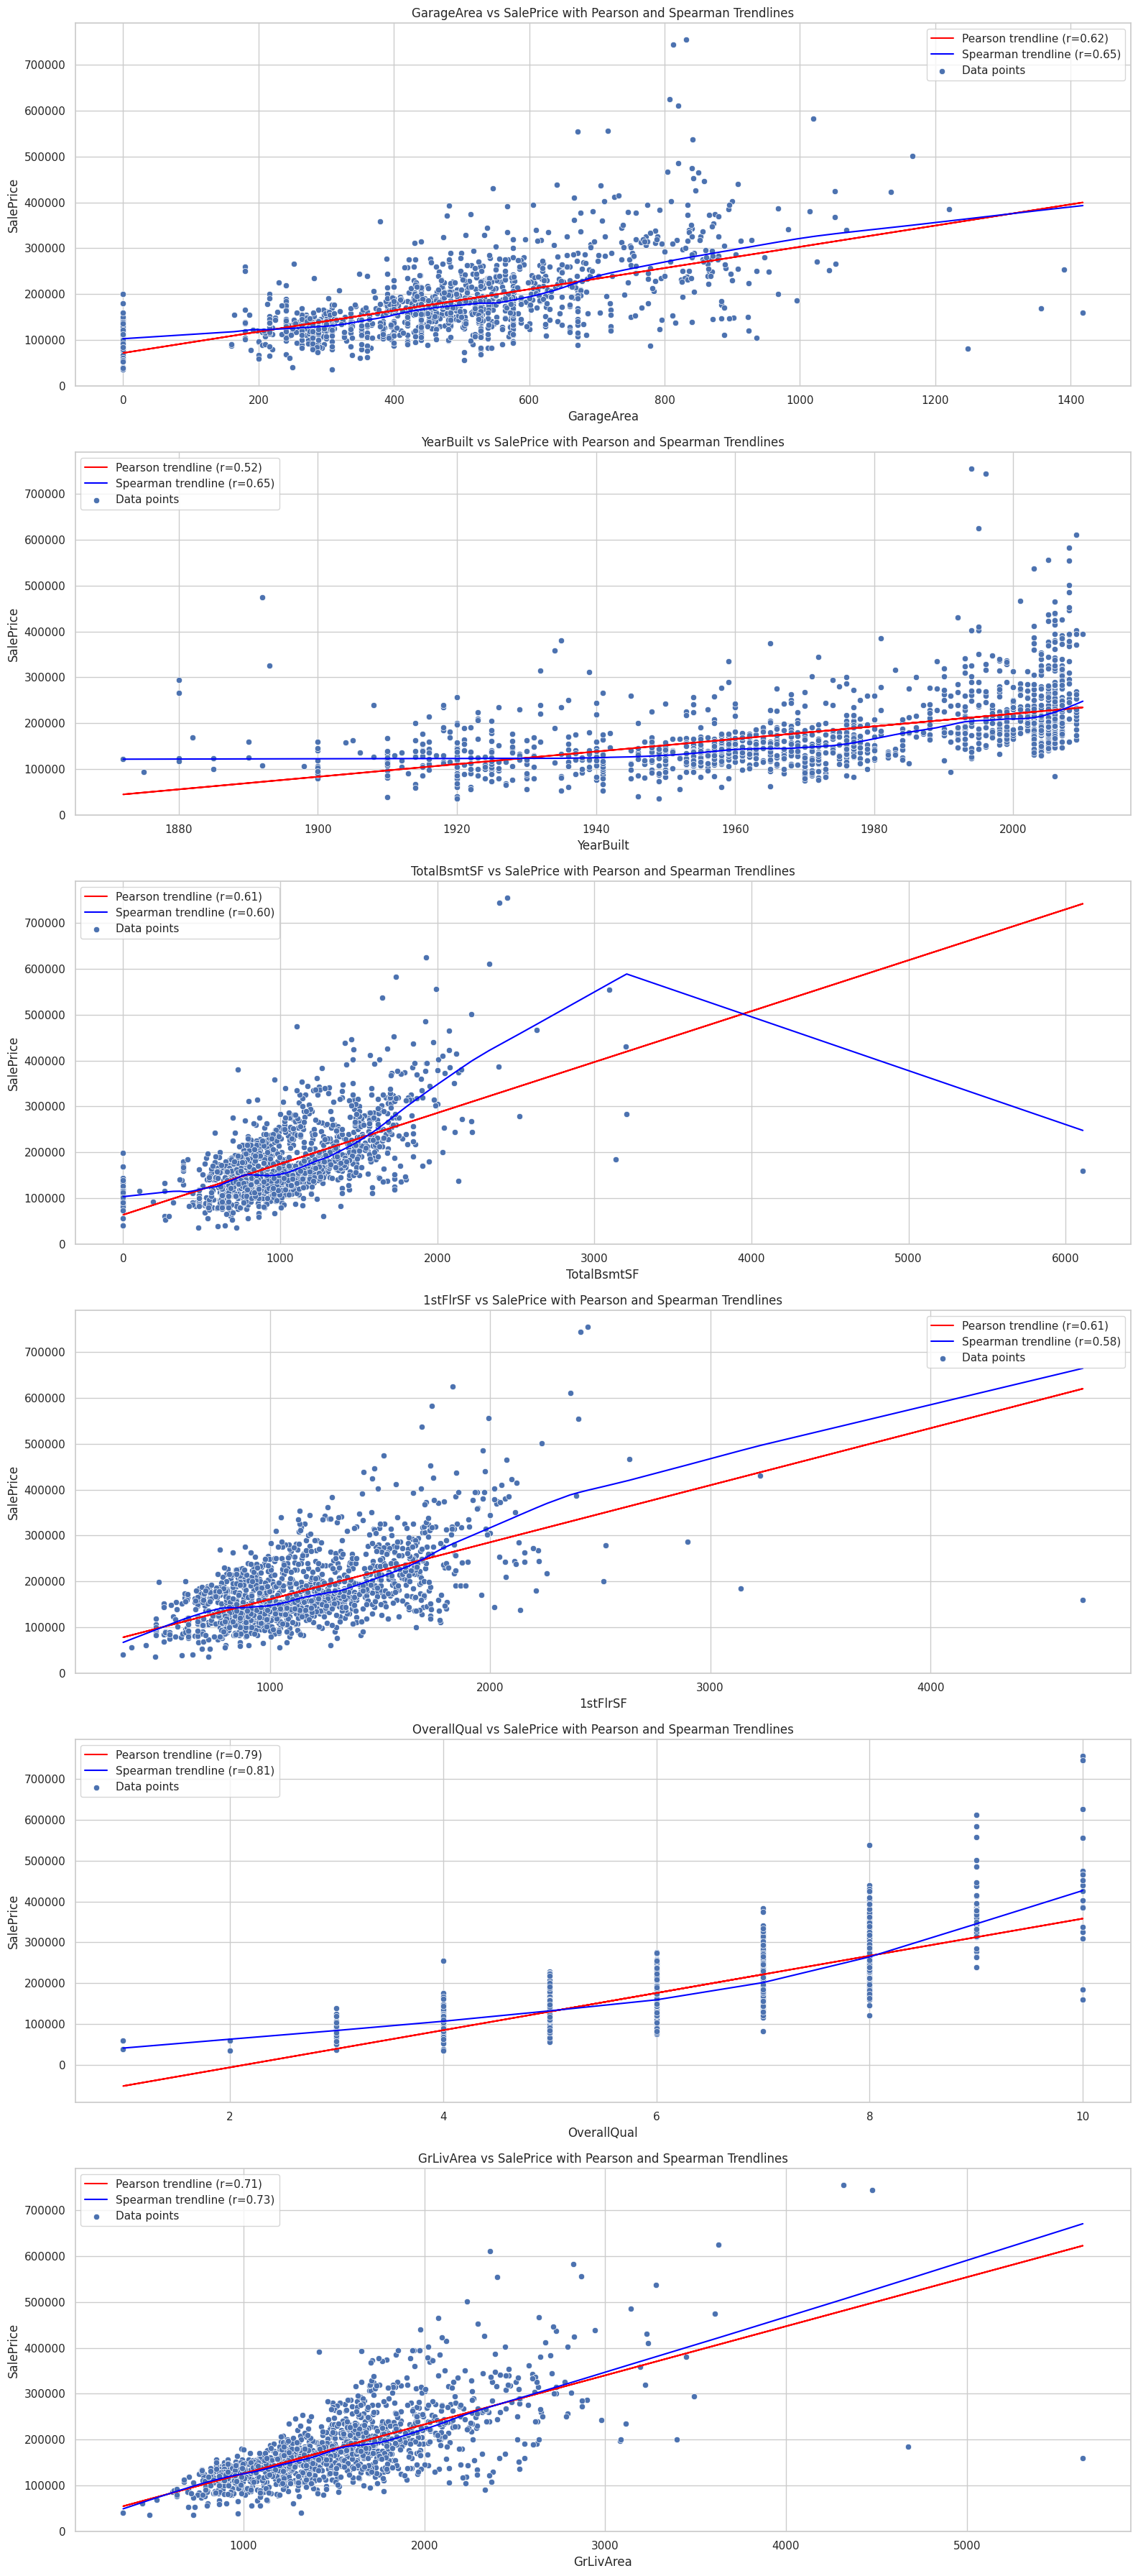

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, linregress
from statsmodels.nonparametric.smoothers_lowess import lowess

# Assuming df is your DataFrame and has been defined elsewhere

# Function to plot a variable against SalePrice with Pearson and Spearman trendlines
def plot_with_trendlines(df, vars, target='SalePrice'):
    num_vars = len(vars)
    plt.figure(figsize=(16, 6 * num_vars))
    
    for i, var in enumerate(vars, 1):
        x = df[var]
        y = df[target]
        
        # Pearson correlation
        pearson_coef, _ = pearsonr(x, y)
        slope_pearson, intercept_pearson, _, _, _ = linregress(x, y)
        line_pearson = slope_pearson * x + intercept_pearson
        
        # Spearman correlation
        spearman_coef, _ = spearmanr(x, y)
        lowess_smoothed = lowess(y, x, frac=0.3)
        
        # Plotting
        plt.subplot(num_vars, 1, i)
        sns.scatterplot(x=x, y=y, label='Data points')
        
        plt.plot(x, line_pearson, color='red', label=f'Pearson trendline (r={pearson_coef:.2f})')
        plt.plot(lowess_smoothed[:, 0], lowess_smoothed[:, 1], color='blue', label=f'Spearman trendline (r={spearman_coef:.2f})')
        
        plt.xlabel(var)
        plt.ylabel(target)
        plt.title(f'{var} vs {target} with Pearson and Spearman Trendlines')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Example usage for multiple variables
variables = ['GarageArea', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'OverallQual', 'GrLivArea']
plot_with_trendlines(df, variables)

* OverallQual and KitchenQual
    * The quality variables show similarities between the Spearman curves for OverallQual and KitchenQual. For KitchenQual, a poor kitchen quality keeps the price down, resulting in a relatively flat price level between 1.0 and 3.0. However, beyond this point, the price increases significantly with higher quality levels.

    * The corresponding curve for OverallQual is closer to the Pearson trendline and indicates a more linear relationship between OverallQual and price. However, the Spearman trendlin e for OverallQual also has a flat appearance for quality levels 1 through 7, after which the price increases more rapidly with each increment in quality, similar to the KitchenQual variable.

    * Given these similarities, we believe it is possible to merge the Spearman curves and create a single quality variable for predicting sale price. This approach will be further analyzed in the next notebook, focusing on feature engineering.


## Conclusion and next steps
 * For OverallQual and KitchenQual we will try use a common variable.

# Section 2

Garage initial assessment
Upon initial examination, there is no strong indication that the GarageFinish feature has a significant correlation with the sale price. Additionally, the initial investigation into the relationship between garage area and sale price reveals a relatively low correlation.

Given that the size of the house typically exhibits a strong correlation with sale price, the comparatively weaker correlation observed with garage area suggests that other factors may have a more pronounced influence on the final sale price.

Further analysis is warranted to understand the nuanced relationship between garage attributes and sale price. This may include exploring potential outliers, considering interactions with other features, and employing more advanced analytical techniques to capture non-linear relationships effectively.

By delving deeper into these factors, we can gain a more comprehensive understanding of the garage's impact on property valuation and make more informed decisions regarding its significance in the overall pricing model.

In our analysis of basement exposure, we observed a noteworthy trend: properties with missing values for basement exposure tend to have lower sale prices. This suggests that the absence of basement exposure data may signal certain property characteristics that contribute to decreased market value.

Moreover, our examination revealed a subtle but discernible impact on sale price attributed to good living quarters within the basement. Properties featuring well-finished living spaces below ground level exhibited a slight positive influence on sale price, indicating a preference among buyers for quality basement amenities.

These findings underscore the importance of considering basement attributes in property valuation, as they can significantly influence market perceptions and ultimately affect sale prices. Further exploration into the nuances of basement features and their impact on property value is warranted to provide deeper insights for real estate decision-making.

Since the the sale prices range is lower and closest to "No" we will impute the missing values with  "No" for future calculations.

There is no clear connection between BsmtFinType and sales price. Since low-quality and average recreation rooms are essentially the same, the finish type has little effect. What can be discerned is that the quality of living quarters is influencing the price; however, this is most likely due to location rather than the finish type.

The sales price tends to increase with newer garages; however, this trend is likely influenced by property characteristics. Outliers were detected between 1993 and 1996, but subsequently, sales prices reverted to lower levels.

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as they support your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

### Summary
* The following variables are the most relevant, they all have a value or 0.6 for either Spearman or Pearson correlation.
    * OverallQual   
    * GrLivArea  
    * GarageArea   
    * TotalBsmtSF  
    * YearBuilt  
    * 1stFlrSF     

From this investigation we can that the following factors are most relevant: Quality, Space(Area), Age(YearBuilt), according to our Business requirement * 1. - "The client is interested in discovering how the house attributes correlate with the sale price". We can now know that these factors and the associated variables has the strongest correlation with the sale price. 

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
